In [2]:
import requests
import bs4
import logging
import re
import nltk
import json
import pprint
import pandas as pd
import numpy

# web scraping

In [395]:
class jobs:
    
    def __init__(self, url):
        r = requests.get(url)
        if r.status_code != 200:
            logging.error("Status code was " + str(r.status_code))
            raise ValueError
        self.html = r.text
        self.soup = bs4.BeautifulSoup(self.html, 'lxml')
        
    def dict_abs_from_soup(self):
        def mentions_seek_redux(z):
            if z is None: return False
            return 'window.SEEK_REDUX_DATA = ' in z
        jsontext = self.soup.find('script', string=mentions_seek_redux).string
        lines = jsontext.split('\n')
        #prog = re.compile('= (.*)')
        #after_re = prog.match(jsontext)
        after_re = re.sub('window.SEEK_REDUX_DATA = ', ' ', lines[1][:-1])
        
        #print after_re
        Decoder = json.JSONDecoder()
        #json_text = open(after_re).read()
        data = Decoder.decode(after_re)
        return data
   
    def state(self):
        job_state = self.dict_abs_from_soup()[u'jobdetails']['result']['locationHierarchy']['state']
        return job_state
    def city(self):
        job_city = self.dict_abs_from_soup()[u'jobdetails']['result']['locationHierarchy']['city']
        return job_city
    def area(self):
        job_area = self.dict_abs_from_soup()[u'jobdetails']['result']['locationHierarchy']['area']
        return job_area
    def wtype(self):
        job_type = self.dict_abs_from_soup()[u'jobdetails']['result']['workType']
        return job_type
    def salary(self):
        job_salary = self.dict_abs_from_soup()[u'jobdetails']['result']['salary']
        return job_salary
    
    def description(self):
        desc = self.soup.find('div', class_='job-template__wrapper').text.encode('utf-8')
                #desc.text.encode(encoding='utf-8')
        return ".".join(desc.strip().split('\n'))
    
    def jobtitle(self):
        job_title = self.dict_abs_from_soup()[u'jobdetails']['result']['title']
        return job_title
    def jobcategory(self):
        job_category = self.dict_abs_from_soup()[u'jobdetails']['result']['classification']['description']
        return job_category
    def advertiser(self):
        job_advertiser = self.dict_abs_from_soup()['jobdetails']['result']['advertiser']['description']
        return job_advertiser
    def id(self):
        job_id = self.dict_abs_from_soup()[u'jobdetails']['result']['id']
        return job_id
    def date_listed(self):
        date_listed = self.dict_abs_from_soup()[u'jobdetails']['result']['listingDate']
        return date_listed
    

In [396]:
def get_job_links_on_page(url):
    page_number = 1
    while True:
        r = requests.get(url +'?page=' + str(page_number))
        if r.status_code != 200:
            raise ValueError
        soup = bs4.BeautifulSoup(r.text)
        #print 'hello'
        fail = soup.find(string="Sorry, we couldn't find anything. Maybe try taking the following steps…")
        #print 'hello2'
        if fail is None:
            print "Showing results from page", page_number
            links = soup.find_all('div', class_='_2oUTWro')
            for link in links:
                yield 'https://www.seek.com.au'+link['href']
            page_number += 1
        else:
            break

In [397]:
url = 'https://www.seek.com.au/business-intelligence-jobs'
#'https://www.seek.com.au/research-scientist-jobs'
#'https://www.seek.com.au/data-analytics-jobs'
#'https://www.seek.com.au/data-analyst-jobs'
#'https://www.seek.com.au/data-scientist-jobs' 
#'https://www.seek.com.au/data-science-jobs' 

import time
all_jobs = []
for link in get_job_links_on_page(url):
    print link
    all_jobs.append(jobs(link))
    time.sleep(3)

Showing results from page 1
https://www.seek.com.au/job/34426327?type=promoted&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34392110?type=promoted&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34428790?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34428792?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34428785?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34428791?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34426327?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34428584?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34423892?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8141946
https://www.seek.com.au/job/34423893

https://www.seek.com.au/job/34290910?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8363155
https://www.seek.com.au/job/34282555?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8363155
https://www.seek.com.au/job/34281459?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8363155
https://www.seek.com.au/job/34277028?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8363155
https://www.seek.com.au/job/34275942?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8363155
Showing results from page 5
https://www.seek.com.au/job/34276205?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8432052
https://www.seek.com.au/job/34268546?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8432052
https://www.seek.com.au/job/34268658?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8432052
https://www.seek.com.au/job/34262553?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8432052
https://www.seek.com.au/job/34265194

https://www.seek.com.au/job/34431390?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8638866
https://www.seek.com.au/job/34430955?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8638866
https://www.seek.com.au/job/34337979?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8638866
https://www.seek.com.au/job/34430446?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8638866
https://www.seek.com.au/job/34341153?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8638866
https://www.seek.com.au/job/34429692?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8638866
https://www.seek.com.au/job/34429403?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8638866
Showing results from page 9
https://www.seek.com.au/job/34429307?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8707799
https://www.seek.com.au/job/34429213?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8707799
https://www.seek.com.au/job/34429534

https://www.seek.com.au/job/34420461?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34410025?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34413223?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34409703?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34293763?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34409022?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34408432?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34408427?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
https://www.seek.com.au/job/34408332?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-8914807
Showing results from page 13
https://www.seek.com.au/job/3440802

https://www.seek.com.au/job/34388130?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34387545?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34386832?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34386401?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34386166?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34386022?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34384624?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34384733?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34384322?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9191515
https://www.seek.com.au/job/34384256?type=standout&userqueryid=c

https://www.seek.com.au/job/34354803?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34354147?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34353901?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34354865?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34353329?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34323650?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34358146?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34260710?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34352130?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9477998
https://www.seek.com.au/job/34351314?type=standout&userqueryid=c

https://www.seek.com.au/job/34321312?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34328362?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34319411?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34319036?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34083239?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34317893?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34317374?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34316426?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34316430?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-9754542
https://www.seek.com.au/job/34315350?type=standard&userqueryid=c

https://www.seek.com.au/job/34286823?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34286151?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34284318?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34284279?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34283815?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34283604?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34283321?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34282512?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34281416?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0029743
https://www.seek.com.au/job/34281164?type=standard&userqueryid=c

https://www.seek.com.au/job/34254246?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34253696?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34204350?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34253423?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34252679?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34252672?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34210362?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34251215?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34236071?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0306948
https://www.seek.com.au/job/34236070?type=standout&userqueryid=c

https://www.seek.com.au/job/34215148?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0514495
Showing results from page 36
https://www.seek.com.au/job/34214999?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/34214772?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/34214550?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/34214042?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/34213942?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/34219221?type=standout&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/34213245?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/34213213?type=standard&userqueryid=ca084417892f60a20a67b10377c8ce2b-0583670
https://www.seek.com.au/job/3421306

In [398]:
all_jobs

[<__main__.jobs instance at 0x1e79caa70>,
 <__main__.jobs instance at 0x1e79ca950>,
 <__main__.jobs instance at 0x1e7ac7c20>,
 <__main__.jobs instance at 0x1e7ac7cf8>,
 <__main__.jobs instance at 0x1e7bd82d8>,
 <__main__.jobs instance at 0x1e7cf65a8>,
 <__main__.jobs instance at 0x1e7e18440>,
 <__main__.jobs instance at 0x1e7f35908>,
 <__main__.jobs instance at 0x1e814cf80>,
 <__main__.jobs instance at 0x1e824fa28>,
 <__main__.jobs instance at 0x1e83c2e60>,
 <__main__.jobs instance at 0x1e83c2f38>,
 <__main__.jobs instance at 0x1e84f7ab8>,
 <__main__.jobs instance at 0x1e8612518>,
 <__main__.jobs instance at 0x1e87229e0>,
 <__main__.jobs instance at 0x1e8843518>,
 <__main__.jobs instance at 0x1e8960440>,
 <__main__.jobs instance at 0x1e8a676c8>,
 <__main__.jobs instance at 0x1e8b83098>,
 <__main__.jobs instance at 0x1e8b91290>,
 <__main__.jobs instance at 0x1e8d9e290>,
 <__main__.jobs instance at 0x1e8fc2f38>,
 <__main__.jobs instance at 0x1e94e9f38>,
 <__main__.jobs instance at 0x1e94

In [399]:
def state_or_none(x):
    try:
        return x.state()
    except:
        return ""
    
def city_or_none(x):
    try:
        return x.city()
    except:
        return ""

def area_or_none(x):
    try:
        return x.area()
    except:
        return ""
    
def wtype_or_none(x):
    try:
        return x.wtype()
    except:
        return ""

def salary_or_none(x):
    try:
        return x.salary()
    except:
        return ""
    
def description_or_none(x):
    try:
        return x.description()
    except:
        return ""
    
def jobtitle_or_none(x):
    try:
        return x.jobtitle()
    except:
        return ""

def jobcate_or_none(x):
    try:
        return x.jobcategory()
    except:
        return ""
def advertiser_or_none(x):
    try:
        return x.advertiser()             
    except:
        return ""
def id_or_none(x):
    try:
        return x.id()
    except:
        return ""
def listed_date_or_none(x):
    try:
        return x.date_listed()
    except:
        return ""

In [400]:
jobs_df = pd.DataFrame({
    'state': [state_or_none(x) for x in all_jobs],
    'city': [city_or_none(x) for x in all_jobs],
    'area': [area_or_none(x) for x in all_jobs],
    'work_type': [wtype_or_none(x) for x in all_jobs],
    'salary': [salary_or_none(x) for x in all_jobs],
    'description': [description_or_none(x) for x in all_jobs], 
    'job_title':[jobtitle_or_none(x) for x in all_jobs],
    'job_category':[jobcate_or_none(x) for x in all_jobs],
    'advertiser':[advertiser_or_none(x) for x in all_jobs],
    'job_id':[id_or_none(x) for x in all_jobs],
    'listed_date':[listed_date_or_none(x) for x in all_jobs]
})
jobs_df

,advertiser,area,city,description,job_category,job_id,job_title,listed_date,salary,state,work_type
0,Diamond Talent,CBD & Inner Suburbs,Melbourne,Business Intelligence Developer. ....Is...,Information & Communication Technology,34426327,Business Intelligence Developer,2017-09-18T01:12:58.000Z,,Victoria,Full Time
1,Thinkbits,"CBD, Inner West & Eastern Suburbs",Sydney,Product Manager at Thinkbits. ....We ar...,Information & Communication Technology,34392110,Product Manager at Thinkbits,2017-09-13T01:05:57.000Z,"$90,000 - $120,000",New South Wales,Full Time
2,Boral Ltd,CBD & Inner Suburbs,Melbourne,Solution Engineer – Business Intelligence Deve...,Information & Communication Technology,34428790,Solution Engineer – Business Intelligence Deve...,2017-09-18T03:21:03.000Z,,Victoria,Full Time
3,Boral Ltd,CBD & Inner Suburbs,Brisbane,Solution Engineer – Business Intelligence Deve...,Information & Communication Technology,34428792,Solution Engineer – Business Intelligence Deve...,2017-09-18T03:21:03.000Z,,Queensland,Full Time
4,Boral Ltd,CBD & Inner Suburbs,Brisbane,Solution Engineer – Business Intelligence Deve...,Information & Communication Technology,34428785,Solution Engineer – Business Intelligence Deve...,2017-09-18T03:21:03.000Z,,Queensland,Full Time
5,Boral Ltd,CBD & Inner Suburbs,Melbourne,Solution Engineer – Business Intelligence Deve...,Information & Communication Technology,34428791,Solution Engineer – Business Intelligence Deve...,2017-09-18T03:21:03.000Z,,Victoria,Full Time
6,Diamond Talent,CBD & Inner Suburbs,Melbourne,Business Intelligence Developer. ....Is...,Information & Communication Technology,34426327,Business Intelligence Developer,2017-09-18T01:12:58.000Z,,Victoria,Full Time
7,Griffith University,Southern Suburbs & Logan,Brisbane,Business Intelligence Analyst. ..Overview...,Information & Communication Technology,34428584,Business Intelligence Analyst,2017-09-17T17:04:05.000Z,$91087 - $102470 p.a. + 17% superannuation,Queensland,Full Time
8,World Vision,Eastern Suburbs,Melbourne,Business Intelligence Data & Reporting Analyst...,Information & Communication Technology,34423892,Business Intelligence Data & Reporting Analyst,2017-09-17T14:18:09.000Z,salary packaging tax benefits available!,Victoria,Full Time
9,World Vision,Eastern Suburbs,Melbourne,Business Intelligence Data & Reporting Analyst...,Information & Communication Technology,34423893,Business Intelligence Data & Reporting Analyst,2017-09-17T14:18:09.000Z,salary packaging tax benefits available!,Victoria,Full Time


In [402]:
jobs_df.to_csv('business_intelligence.csv', encoding='utf-8')

## Concat the fives docs that saved to CSV from web scraping 

In [356]:
import pandas as pd

data_scientist_df = pd.read_csv('data_scientist.csv')
data_analyst_df = pd.read_csv('data_analyst.csv')
data_science_2_df = pd.read_csv('data_science_2.csv')
data_analytics_df = pd.read_csv('data_analytics.csv')
business_intelligence_df = pd.read_csv('business_intelligence.csv')
research_scientist_df = pd.read_csv('research_scientist.csv')


In [357]:
frames = [data_scientist_df, data_science_2_df,data_analyst_df, data_analytics_df,
          business_intelligence_df,research_scientist_df]
df = pd.concat(frames)
df

,Unnamed: 0,advertiser,area,city,description,job_category,job_id,job_title,listed_date,salary,state,work_type
0,0,AtlasPlato,NaN,Sydney,Business Development Manager - Data Analytics....,Information & Communication Technology,34404395,Business Development Manager - Data Analytics,2017-09-14T03:01:42.000Z,"$150,000 - $200,000+ base plus uncapped comms",New South Wales,Full Time
1,1,Crypton Analytics,CBD & Inner Suburbs,Melbourne,Data Scientist (Cryptocurrency). ....Ab...,Science & Technology,34374593,Data Scientist (Cryptocurrency),2017-09-11T05:42:25.000Z,"Dependent on experience $100,000 - $200,000+",Victoria,Full Time
2,2,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ..DATA SCIENTIST .NORTH SYD...,Information & Communication Technology,34432524,Data Scientist,2017-09-18T06:40:10.000Z,Great Day Rates,New South Wales,Contract/Temp
3,3,Finite IT Recruitment Solutions,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Data Scientist. ..My large Telco c...,Information & Communication Technology,34431181,Senior Data Scientist,2017-09-18T05:28:56.000Z,$800 - $1000 per day,New South Wales,Contract/Temp
4,4,Big Wednesday,NaN,Melbourne,"Lead Data Scientist, Director Level, Relocate ...",Information & Communication Technology,34423928,"Lead Data Scientist, Director Level, Relocate ...",2017-09-17T16:59:45.000Z,Negotiable,Victoria,Full Time
5,5,Northbridge IT Recruitment,CBD & Inner Suburbs,Melbourne,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,34424166,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:25.000Z,"Lucrative Daily Rates, LT Contracts, Melbourne...",Victoria,Contract/Temp
6,6,Northbridge IT Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,34424165,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:24.000Z,"Lucrative Daily Rates, LT Contract, Sydney CBD",New South Wales,Contract/Temp
7,7,Sirius Technology Melbourne part of Sirius Peo...,CBD & Inner Suburbs,Melbourne,Call Sirius Technology.61 2 9270 5200..Data Sc...,Information & Communication Technology,34418037,Data Scientist - Health industry,2017-09-15T05:59:45.000Z,NaN,Victoria,Contract/Temp
8,8,Opus Recruitment Solutions,NaN,Sydney,Senior Data Scientist. ...DATA SCIENTIST – ...,Information & Communication Technology,34420319,Senior Data Scientist,2017-09-15T07:48:07.000Z,$150000 - $200000 per annum,New South Wales,Full Time
9,9,Precision Sourcing,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ....Do you have machi...,Information & Communication Technology,34418536,Data Scientist,2017-09-15T06:19:55.000Z,120000,New South Wales,Full Time


In [367]:
# DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)[source]
df_no_duplicates = df.drop_duplicates(subset='job_id', keep='first', inplace=False)
df_no_duplicates

,Unnamed: 0,advertiser,area,city,description,job_category,job_id,job_title,listed_date,salary,state,work_type
0,0,AtlasPlato,NaN,Sydney,Business Development Manager - Data Analytics....,Information & Communication Technology,34404395,Business Development Manager - Data Analytics,2017-09-14T03:01:42.000Z,"$150,000 - $200,000+ base plus uncapped comms",New South Wales,Full Time
1,1,Crypton Analytics,CBD & Inner Suburbs,Melbourne,Data Scientist (Cryptocurrency). ....Ab...,Science & Technology,34374593,Data Scientist (Cryptocurrency),2017-09-11T05:42:25.000Z,"Dependent on experience $100,000 - $200,000+",Victoria,Full Time
2,2,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ..DATA SCIENTIST .NORTH SYD...,Information & Communication Technology,34432524,Data Scientist,2017-09-18T06:40:10.000Z,Great Day Rates,New South Wales,Contract/Temp
3,3,Finite IT Recruitment Solutions,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Data Scientist. ..My large Telco c...,Information & Communication Technology,34431181,Senior Data Scientist,2017-09-18T05:28:56.000Z,$800 - $1000 per day,New South Wales,Contract/Temp
4,4,Big Wednesday,NaN,Melbourne,"Lead Data Scientist, Director Level, Relocate ...",Information & Communication Technology,34423928,"Lead Data Scientist, Director Level, Relocate ...",2017-09-17T16:59:45.000Z,Negotiable,Victoria,Full Time
5,5,Northbridge IT Recruitment,CBD & Inner Suburbs,Melbourne,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,34424166,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:25.000Z,"Lucrative Daily Rates, LT Contracts, Melbourne...",Victoria,Contract/Temp
6,6,Northbridge IT Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,34424165,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:24.000Z,"Lucrative Daily Rates, LT Contract, Sydney CBD",New South Wales,Contract/Temp
7,7,Sirius Technology Melbourne part of Sirius Peo...,CBD & Inner Suburbs,Melbourne,Call Sirius Technology.61 2 9270 5200..Data Sc...,Information & Communication Technology,34418037,Data Scientist - Health industry,2017-09-15T05:59:45.000Z,NaN,Victoria,Contract/Temp
8,8,Opus Recruitment Solutions,NaN,Sydney,Senior Data Scientist. ...DATA SCIENTIST – ...,Information & Communication Technology,34420319,Senior Data Scientist,2017-09-15T07:48:07.000Z,$150000 - $200000 per annum,New South Wales,Full Time
9,9,Precision Sourcing,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ....Do you have machi...,Information & Communication Technology,34418536,Data Scientist,2017-09-15T06:19:55.000Z,120000,New South Wales,Full Time


In [368]:
df_no_duplicates.shape

(2265, 12)

In [369]:
df_no_duplicates.columns

Index([u'Unnamed: 0', u'advertiser', u'area', u'city', u'description',
       u'job_category', u'job_id', u'job_title', u'listed_date', u'salary',
       u'state', u'work_type'],
      dtype='object')

In [370]:
del df_no_duplicates['Unnamed: 0']

In [371]:
df_cat = df_no_duplicates.set_index(['job_id'])

## salary column processing

In [372]:
df_cat.salary

job_id
34404395        $150,000 - $200,000+ base plus uncapped comms
34374593         Dependent on experience $100,000 - $200,000+
34432524                                     Great Day Rates 
34431181                                $800 - $1000 per day 
34423928                                           Negotiable
34424166    Lucrative Daily Rates, LT Contracts, Melbourne...
34424165       Lucrative Daily Rates, LT Contract, Sydney CBD
34418037                                                  NaN
34420319                          $150000 - $200000 per annum
34418536                                               120000
34416987                                                  NaN
34417638                  Base + 13% Super + Bonuses/Benefits
34405448                 Up to $135,000 package plus benefits
34403207                                         130K + Super
34401554                                                  NaN
34406531                                                  NaN
3

In [373]:
df_cat.salary.replace('nan', '0', inplace=True)

In [374]:
df_cat

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type
job_id,,,,,,,,,,
34404395,AtlasPlato,NaN,Sydney,Business Development Manager - Data Analytics....,Information & Communication Technology,Business Development Manager - Data Analytics,2017-09-14T03:01:42.000Z,"$150,000 - $200,000+ base plus uncapped comms",New South Wales,Full Time
34374593,Crypton Analytics,CBD & Inner Suburbs,Melbourne,Data Scientist (Cryptocurrency). ....Ab...,Science & Technology,Data Scientist (Cryptocurrency),2017-09-11T05:42:25.000Z,"Dependent on experience $100,000 - $200,000+",Victoria,Full Time
34432524,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ..DATA SCIENTIST .NORTH SYD...,Information & Communication Technology,Data Scientist,2017-09-18T06:40:10.000Z,Great Day Rates,New South Wales,Contract/Temp
34431181,Finite IT Recruitment Solutions,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Data Scientist. ..My large Telco c...,Information & Communication Technology,Senior Data Scientist,2017-09-18T05:28:56.000Z,$800 - $1000 per day,New South Wales,Contract/Temp
34423928,Big Wednesday,NaN,Melbourne,"Lead Data Scientist, Director Level, Relocate ...",Information & Communication Technology,"Lead Data Scientist, Director Level, Relocate ...",2017-09-17T16:59:45.000Z,Negotiable,Victoria,Full Time
34424166,Northbridge IT Recruitment,CBD & Inner Suburbs,Melbourne,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:25.000Z,"Lucrative Daily Rates, LT Contracts, Melbourne...",Victoria,Contract/Temp
34424165,Northbridge IT Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:24.000Z,"Lucrative Daily Rates, LT Contract, Sydney CBD",New South Wales,Contract/Temp
34418037,Sirius Technology Melbourne part of Sirius Peo...,CBD & Inner Suburbs,Melbourne,Call Sirius Technology.61 2 9270 5200..Data Sc...,Information & Communication Technology,Data Scientist - Health industry,2017-09-15T05:59:45.000Z,NaN,Victoria,Contract/Temp
34420319,Opus Recruitment Solutions,NaN,Sydney,Senior Data Scientist. ...DATA SCIENTIST – ...,Information & Communication Technology,Senior Data Scientist,2017-09-15T07:48:07.000Z,$150000 - $200000 per annum,New South Wales,Full Time


In [375]:
df_cat['salary1'] = df_cat['salary'].replace('[Kk]\\b', '000', regex=True)


In [376]:
df_cat['salary1'] = df_cat['salary1'].replace('\,', '', regex=True)

In [377]:
df_cat

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary1
job_id,,,,,,,,,,,
34404395,AtlasPlato,NaN,Sydney,Business Development Manager - Data Analytics....,Information & Communication Technology,Business Development Manager - Data Analytics,2017-09-14T03:01:42.000Z,"$150,000 - $200,000+ base plus uncapped comms",New South Wales,Full Time,$150000 - $200000+ base plus uncapped comms
34374593,Crypton Analytics,CBD & Inner Suburbs,Melbourne,Data Scientist (Cryptocurrency). ....Ab...,Science & Technology,Data Scientist (Cryptocurrency),2017-09-11T05:42:25.000Z,"Dependent on experience $100,000 - $200,000+",Victoria,Full Time,Dependent on experience $100000 - $200000+
34432524,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ..DATA SCIENTIST .NORTH SYD...,Information & Communication Technology,Data Scientist,2017-09-18T06:40:10.000Z,Great Day Rates,New South Wales,Contract/Temp,Great Day Rates
34431181,Finite IT Recruitment Solutions,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Data Scientist. ..My large Telco c...,Information & Communication Technology,Senior Data Scientist,2017-09-18T05:28:56.000Z,$800 - $1000 per day,New South Wales,Contract/Temp,$800 - $1000 per day
34423928,Big Wednesday,NaN,Melbourne,"Lead Data Scientist, Director Level, Relocate ...",Information & Communication Technology,"Lead Data Scientist, Director Level, Relocate ...",2017-09-17T16:59:45.000Z,Negotiable,Victoria,Full Time,Negotiable
34424166,Northbridge IT Recruitment,CBD & Inner Suburbs,Melbourne,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:25.000Z,"Lucrative Daily Rates, LT Contracts, Melbourne...",Victoria,Contract/Temp,Lucrative Daily Rates LT Contracts Melbourne CBD
34424165,Northbridge IT Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:24.000Z,"Lucrative Daily Rates, LT Contract, Sydney CBD",New South Wales,Contract/Temp,Lucrative Daily Rates LT Contract Sydney CBD
34418037,Sirius Technology Melbourne part of Sirius Peo...,CBD & Inner Suburbs,Melbourne,Call Sirius Technology.61 2 9270 5200..Data Sc...,Information & Communication Technology,Data Scientist - Health industry,2017-09-15T05:59:45.000Z,NaN,Victoria,Contract/Temp,NaN
34420319,Opus Recruitment Solutions,NaN,Sydney,Senior Data Scientist. ...DATA SCIENTIST – ...,Information & Communication Technology,Senior Data Scientist,2017-09-15T07:48:07.000Z,$150000 - $200000 per annum,New South Wales,Full Time,$150000 - $200000 per annum


In [378]:
df_cat.salary1

job_id
34404395          $150000 - $200000+ base plus uncapped comms
34374593           Dependent on experience $100000 - $200000+
34432524                                     Great Day Rates 
34431181                                $800 - $1000 per day 
34423928                                           Negotiable
34424166     Lucrative Daily Rates LT Contracts Melbourne CBD
34424165         Lucrative Daily Rates LT Contract Sydney CBD
34418037                                                  NaN
34420319                          $150000 - $200000 per annum
34418536                                               120000
34416987                                                  NaN
34417638                  Base + 13% Super + Bonuses/Benefits
34405448                  Up to $135000 package plus benefits
34403207                                       130000 + Super
34401554                                                  NaN
34406531                                                  NaN
3

In [381]:
def extract(x):
    pattern = re.compile('\d+')
    post_regex = pattern.findall(str(x))
    if len(post_regex) >= 1:
        return post_regex[0]
    else:
        return 0


In [382]:
type(post_regex)

list

In [383]:
df_cat['salary2'] = df_cat['salary1'].map(lambda x: extract(x))
df_cat[['salary1','salary2']]

,salary1,salary2
job_id,,
34404395,$150000 - $200000+ base plus uncapped comms,150000
34374593,Dependent on experience $100000 - $200000+,100000
34432524,Great Day Rates,0
34431181,$800 - $1000 per day,800
34423928,Negotiable,0
34424166,Lucrative Daily Rates LT Contracts Melbourne CBD,0
34424165,Lucrative Daily Rates LT Contract Sydney CBD,0
34418037,NaN,0
34420319,$150000 - $200000 per annum,150000


In [384]:
def extract2(x):
    pattern = re.compile('\d+')
    post_regex = pattern.findall(str(x))
    if len(post_regex) > 1:
        return post_regex[1]
    else:
        return 0

df_cat['salary3'] = df_cat['salary1'].map(lambda x: extract2(x))
df_cat['salary3']

job_id
34404395    200000
34374593    200000
34432524         0
34431181      1000
34423928         0
34424166         0
34424165         0
34418037         0
34420319    200000
34418536         0
34416987         0
34417638         0
34405448         0
34403207         0
34401554         0
34406531         0
34407059        00
34402835    109999
34398783         0
34392037         0
34387172         0
34385569         0
34398536         0
34383078         0
34384990         0
34376241         0
34375806         0
34372997     80000
34398612         0
34367719         0
             ...  
34355299         0
34355300         0
34415588         0
34387879     78000
34387880     78000
34276345    111619
34305814         0
34386934    128000
34386933    128000
34322557         0
34424818         0
34301242         0
34265637         0
34231704    100000
34234680         0
34225884    100000
34393913    109183
34375486        00
34227969         0
34227968         0
34367085         0
34360

In [386]:
df_cat

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary1,salary2,salary3
job_id,,,,,,,,,,,,,
34404395,AtlasPlato,NaN,Sydney,Business Development Manager - Data Analytics....,Information & Communication Technology,Business Development Manager - Data Analytics,2017-09-14T03:01:42.000Z,"$150,000 - $200,000+ base plus uncapped comms",New South Wales,Full Time,$150000 - $200000+ base plus uncapped comms,150000,200000
34374593,Crypton Analytics,CBD & Inner Suburbs,Melbourne,Data Scientist (Cryptocurrency). ....Ab...,Science & Technology,Data Scientist (Cryptocurrency),2017-09-11T05:42:25.000Z,"Dependent on experience $100,000 - $200,000+",Victoria,Full Time,Dependent on experience $100000 - $200000+,100000,200000
34432524,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ..DATA SCIENTIST .NORTH SYD...,Information & Communication Technology,Data Scientist,2017-09-18T06:40:10.000Z,Great Day Rates,New South Wales,Contract/Temp,Great Day Rates,0,0
34431181,Finite IT Recruitment Solutions,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Data Scientist. ..My large Telco c...,Information & Communication Technology,Senior Data Scientist,2017-09-18T05:28:56.000Z,$800 - $1000 per day,New South Wales,Contract/Temp,$800 - $1000 per day,800,1000
34423928,Big Wednesday,NaN,Melbourne,"Lead Data Scientist, Director Level, Relocate ...",Information & Communication Technology,"Lead Data Scientist, Director Level, Relocate ...",2017-09-17T16:59:45.000Z,Negotiable,Victoria,Full Time,Negotiable,0,0
34424166,Northbridge IT Recruitment,CBD & Inner Suburbs,Melbourne,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:25.000Z,"Lucrative Daily Rates, LT Contracts, Melbourne...",Victoria,Contract/Temp,Lucrative Daily Rates LT Contracts Melbourne CBD,0,0
34424165,Northbridge IT Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:24.000Z,"Lucrative Daily Rates, LT Contract, Sydney CBD",New South Wales,Contract/Temp,Lucrative Daily Rates LT Contract Sydney CBD,0,0
34418037,Sirius Technology Melbourne part of Sirius Peo...,CBD & Inner Suburbs,Melbourne,Call Sirius Technology.61 2 9270 5200..Data Sc...,Information & Communication Technology,Data Scientist - Health industry,2017-09-15T05:59:45.000Z,NaN,Victoria,Contract/Temp,NaN,0,0
34420319,Opus Recruitment Solutions,NaN,Sydney,Senior Data Scientist. ...DATA SCIENTIST – ...,Information & Communication Technology,Senior Data Scientist,2017-09-15T07:48:07.000Z,$150000 - $200000 per annum,New South Wales,Full Time,$150000 - $200000 per annum,150000,200000


In [387]:
df_cat['salary2'] = df_cat['salary2'].astype(float)

In [388]:
df_cat['salary3'] = df_cat['salary3'].astype(float)

In [389]:
df_cat[df_cat['salary2'] < 1000].salary2.unique()

array([   0.,  800.,   13.,   65.,  115.,  130.,  250.,    5.,    6.,
        700.,  600.,  450.,  750.,   80.,  200.,  630.,   12.,   50.,
        480.,   55.,   60.,  105.,   40.,   85.,    9.,  650.,    2.,
        500.,   48.,   17.,  520.,  680.,  760.,   29.,  120.,   32.,
        550.,   30.,  100.,   45.,    4.,   90.,  150.,   95.,    3.,
        140.,   70.,  930.,  110.,   84.,  850.,    8.,   42.,  102.])

In [282]:
df_cat[df_cat.salary2 !=0].sort_values('salary2', ascending = True)

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary1,salary2,salary3
job_id,,,,,,,,,,,,,
34323820,Launch Recruitment Pty Ltd,North Shore & Northern Beaches,Sydney,Marketing Capability Manager - Data Campaign A...,Marketing & Communications,Marketing Capability Manager - Data Campaign A...,2017-09-05T01:02:02.000Z,2 Year Fixed Term Contract,New South Wales,Full Time,2 Year Fixed Term Contract,2.0,0.0
34226996,FutureYou,CBD & Inner Suburbs,Melbourne,IT Lawyer/Senior Associate | 5-8 years PQE | M...,Legal,IT Lawyer/Senior Associate | 5-8 years PQE | M...,2017-08-23T05:24:08.000Z,Call Janina Loch on (03) 8547 1385,Victoria,Full Time,Call Janina Loch on (03) 8547 1385,3.0,8547.0
34351270,GRANITE CONSULTING,CBD & Inner Suburbs,Melbourne,Enterprise Data Architect. ..4 Month Cont...,Information & Communication Technology,Enterprise Data Architect,2017-09-07T07:01:05.000Z,4 Month Contract - Work/life Balance,Victoria,Contract/Temp,4 Month Contract - Wor000/life Balance,4.0,0.0
34407649,Hudson,CBD & Inner Suburbs,Melbourne,Senior Business Analyst. ..Your new compa...,Government & Defence,Senior Business Analyst,2017-09-13T20:29:58.000Z,VPS 5 Equivalent,Victoria,Contract/Temp,VPS 5 Equivalent,5.0,0.0
34434097,sportsbet.com.au,CBD & Inner Suburbs,Melbourne,Domain BA. ... ..The Job.As a Domain BA a...,Information & Communication Technology,Domain BA,2017-09-18T08:23:07.000Z,+ 5 Weeks Annual Leave + Company Bonus,Victoria,Full Time,+ 5 Weeks Annual Leave + Company Bonus,5.0,0.0
34383038,Nine Entertainment Co,"CBD, Inner West & Eastern Suburbs",Sydney,Digital Marketing Manager - Contract. ..Thi...,Marketing & Communications,Digital Marketing Manager - Contract,2017-09-12T03:00:44.000Z,6 month full time contract,New South Wales,Contract/Temp,6 month full time contract,6.0,0.0
34415519,TRS - IT & Communications,"CBD, Inner West & Eastern Suburbs",Sydney,Sydney. .... BI/DW Project Manager - L...,Information & Communication Technology,BI/DW Project Manager - Landmark Transformatio...,2017-09-15T04:00:21.000Z,Good Daily Rate - 6+ Month Contract,New South Wales,Contract/Temp,Good Daily Rate - 6+ Month Contract,6.0,0.0
34415159,Empirics Data Solutions,CBD & Inner Suburbs,Melbourne,SQL Developer. ..6 MONTHS FIXED TERM.Pu...,Information & Communication Technology,SQL Developer,2017-09-15T03:39:01.000Z,FIXED TERM - 6 MONTHS $80k pro-rata package,Victoria,Contract/Temp,FIXED TERM - 6 MONTHS $80000 pro-rata package,6.0,80000.0
34410963,Transport for NSW,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Financial Performance and Reporting Ana...,Consulting & Strategy,Senior Financial Performance and Reporting Ana...,2017-09-14T23:15:44.000Z,"Transport Service Grade 8 ($109,589 - $122,739)",New South Wales,Full Time,Transport Service Grade 8 ($109589 - $122739),8.0,109589.0


In [283]:
df_cat

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary1,salary2,salary3
job_id,,,,,,,,,,,,,
34404395,AtlasPlato,NaN,Sydney,Business Development Manager - Data Analytics....,Information & Communication Technology,Business Development Manager - Data Analytics,2017-09-14T03:01:42.000Z,"$150,000 - $200,000+ base plus uncapped comms",New South Wales,Full Time,$150000 - $200000+ base plus uncapped comms,150000.0,200000.0
34374593,Crypton Analytics,CBD & Inner Suburbs,Melbourne,Data Scientist (Cryptocurrency). ....Ab...,Science & Technology,Data Scientist (Cryptocurrency),2017-09-11T05:42:25.000Z,"Dependent on experience $100,000 - $200,000+",Victoria,Full Time,Dependent on experience $100000 - $200000+,100000.0,200000.0
34432524,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ..DATA SCIENTIST .NORTH SYD...,Information & Communication Technology,Data Scientist,2017-09-18T06:40:10.000Z,Great Day Rates,New South Wales,Contract/Temp,Great Day Rates,0.0,0.0
34431181,Finite IT Recruitment Solutions,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Data Scientist. ..My large Telco c...,Information & Communication Technology,Senior Data Scientist,2017-09-18T05:28:56.000Z,$800 - $1000 per day,New South Wales,Contract/Temp,$800 - $1000 per day,800.0,1000.0
34423928,Big Wednesday,NaN,Melbourne,"Lead Data Scientist, Director Level, Relocate ...",Information & Communication Technology,"Lead Data Scientist, Director Level, Relocate ...",2017-09-17T16:59:45.000Z,Negotiable,Victoria,Full Time,Negotiable,0.0,0.0
34424166,Northbridge IT Recruitment,CBD & Inner Suburbs,Melbourne,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:25.000Z,"Lucrative Daily Rates, LT Contracts, Melbourne...",Victoria,Contract/Temp,Lucrative Daily Rates LT Contracts Melbourne CBD,0.0,0.0
34424165,Northbridge IT Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:24.000Z,"Lucrative Daily Rates, LT Contract, Sydney CBD",New South Wales,Contract/Temp,Lucrative Daily Rates LT Contract Sydney CBD,0.0,0.0
34418037,Sirius Technology Melbourne part of Sirius Peo...,CBD & Inner Suburbs,Melbourne,Call Sirius Technology.61 2 9270 5200..Data Sc...,Information & Communication Technology,Data Scientist - Health industry,2017-09-15T05:59:45.000Z,NaN,Victoria,Contract/Temp,NaN,0.0,0.0
34420319,Opus Recruitment Solutions,NaN,Sydney,Senior Data Scientist. ...DATA SCIENTIST – ...,Information & Communication Technology,Senior Data Scientist,2017-09-15T07:48:07.000Z,$150000 - $200000 per annum,New South Wales,Full Time,$150000 - $200000 per annum,150000.0,200000.0


In [394]:
def added(row):
    if row['salary3'] - row['salary2'] > 60000:
        val = row['salary3']
    elif (row['salary2'] >= 29) & (row['salary2'] < 120):
        if row['salary3'] != 0:
            val = (row['salary2'] + row['salary3'])/2 *7.5 *  5 * 48
        else:
            val = row['salary2'] * 7.5 * 5 * 48
    elif (row['salary2'] >= 240) & (row['salary2'] < 1200):
        if row['salary3'] != 0:
            val = (row['salary2'] + row['salary3'])/2 *  5 * 48
        else:
            val = row['salary2'] *  5 * 48
    else:
        if row['salary3'] != 0:
            val = (row['salary2'] + row['salary3'])/2
        else: 
            val = row['salary2']
    return val

In [395]:
df_cat['salary4'] = df_cat.apply(added, axis=1)

In [396]:
df_cat[df_cat.salary2 !=0].sort_values('salary2', ascending = True)

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary1,salary2,salary3,salary4
job_id,,,,,,,,,,,,,,
34323820,Launch Recruitment Pty Ltd,North Shore & Northern Beaches,Sydney,Marketing Capability Manager - Data Campaign A...,Marketing & Communications,Marketing Capability Manager - Data Campaign A...,2017-09-05T01:02:02.000Z,2 Year Fixed Term Contract,New South Wales,Full Time,2 Year Fixed Term Contract,2.0,0.0,2.0
34226996,FutureYou,CBD & Inner Suburbs,Melbourne,IT Lawyer/Senior Associate | 5-8 years PQE | M...,Legal,IT Lawyer/Senior Associate | 5-8 years PQE | M...,2017-08-23T05:24:08.000Z,Call Janina Loch on (03) 8547 1385,Victoria,Full Time,Call Janina Loch on (03) 8547 1385,3.0,8547.0,4275.0
34351270,GRANITE CONSULTING,CBD & Inner Suburbs,Melbourne,Enterprise Data Architect. ..4 Month Cont...,Information & Communication Technology,Enterprise Data Architect,2017-09-07T07:01:05.000Z,4 Month Contract - Work/life Balance,Victoria,Contract/Temp,4 Month Contract - Wor000/life Balance,4.0,0.0,4.0
34407649,Hudson,CBD & Inner Suburbs,Melbourne,Senior Business Analyst. ..Your new compa...,Government & Defence,Senior Business Analyst,2017-09-13T20:29:58.000Z,VPS 5 Equivalent,Victoria,Contract/Temp,VPS 5 Equivalent,5.0,0.0,5.0
34434097,sportsbet.com.au,CBD & Inner Suburbs,Melbourne,Domain BA. ... ..The Job.As a Domain BA a...,Information & Communication Technology,Domain BA,2017-09-18T08:23:07.000Z,+ 5 Weeks Annual Leave + Company Bonus,Victoria,Full Time,+ 5 Weeks Annual Leave + Company Bonus,5.0,0.0,5.0
34383038,Nine Entertainment Co,"CBD, Inner West & Eastern Suburbs",Sydney,Digital Marketing Manager - Contract. ..Thi...,Marketing & Communications,Digital Marketing Manager - Contract,2017-09-12T03:00:44.000Z,6 month full time contract,New South Wales,Contract/Temp,6 month full time contract,6.0,0.0,6.0
34415519,TRS - IT & Communications,"CBD, Inner West & Eastern Suburbs",Sydney,Sydney. .... BI/DW Project Manager - L...,Information & Communication Technology,BI/DW Project Manager - Landmark Transformatio...,2017-09-15T04:00:21.000Z,Good Daily Rate - 6+ Month Contract,New South Wales,Contract/Temp,Good Daily Rate - 6+ Month Contract,6.0,0.0,6.0
34415159,Empirics Data Solutions,CBD & Inner Suburbs,Melbourne,SQL Developer. ..6 MONTHS FIXED TERM.Pu...,Information & Communication Technology,SQL Developer,2017-09-15T03:39:01.000Z,FIXED TERM - 6 MONTHS $80k pro-rata package,Victoria,Contract/Temp,FIXED TERM - 6 MONTHS $80000 pro-rata package,6.0,80000.0,80000.0
34410963,Transport for NSW,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Financial Performance and Reporting Ana...,Consulting & Strategy,Senior Financial Performance and Reporting Ana...,2017-09-14T23:15:44.000Z,"Transport Service Grade 8 ($109,589 - $122,739)",New South Wales,Full Time,Transport Service Grade 8 ($109589 - $122739),8.0,109589.0,109589.0


# Question 1

In [400]:
df_cat

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary1,salary2,salary3,salary4
job_id,,,,,,,,,,,,,,
34404395,AtlasPlato,NaN,Sydney,Business Development Manager - Data Analytics....,Information & Communication Technology,Business Development Manager - Data Analytics,2017-09-14T03:01:42.000Z,"$150,000 - $200,000+ base plus uncapped comms",New South Wales,Full Time,$150000 - $200000+ base plus uncapped comms,150000.0,200000.0,175000.0
34374593,Crypton Analytics,CBD & Inner Suburbs,Melbourne,Data Scientist (Cryptocurrency). ....Ab...,Science & Technology,Data Scientist (Cryptocurrency),2017-09-11T05:42:25.000Z,"Dependent on experience $100,000 - $200,000+",Victoria,Full Time,Dependent on experience $100000 - $200000+,100000.0,200000.0,200000.0
34432524,FinXL IT Professional Services,"CBD, Inner West & Eastern Suburbs",Sydney,Data Scientist. ..DATA SCIENTIST .NORTH SYD...,Information & Communication Technology,Data Scientist,2017-09-18T06:40:10.000Z,Great Day Rates,New South Wales,Contract/Temp,Great Day Rates,0.0,0.0,0.0
34431181,Finite IT Recruitment Solutions,"CBD, Inner West & Eastern Suburbs",Sydney,Senior Data Scientist. ..My large Telco c...,Information & Communication Technology,Senior Data Scientist,2017-09-18T05:28:56.000Z,$800 - $1000 per day,New South Wales,Contract/Temp,$800 - $1000 per day,800.0,1000.0,216000.0
34423928,Big Wednesday,NaN,Melbourne,"Lead Data Scientist, Director Level, Relocate ...",Information & Communication Technology,"Lead Data Scientist, Director Level, Relocate ...",2017-09-17T16:59:45.000Z,Negotiable,Victoria,Full Time,Negotiable,0.0,0.0,0.0
34424166,Northbridge IT Recruitment,CBD & Inner Suburbs,Melbourne,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:25.000Z,"Lucrative Daily Rates, LT Contracts, Melbourne...",Victoria,Contract/Temp,Lucrative Daily Rates LT Contracts Melbourne CBD,0.0,0.0,0.0
34424165,Northbridge IT Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",Information & Communication Technology,"DATA SCIENTISTS & BIG DATA ENGINEERS, Implemen...",2017-09-17T21:30:24.000Z,"Lucrative Daily Rates, LT Contract, Sydney CBD",New South Wales,Contract/Temp,Lucrative Daily Rates LT Contract Sydney CBD,0.0,0.0,0.0
34418037,Sirius Technology Melbourne part of Sirius Peo...,CBD & Inner Suburbs,Melbourne,Call Sirius Technology.61 2 9270 5200..Data Sc...,Information & Communication Technology,Data Scientist - Health industry,2017-09-15T05:59:45.000Z,NaN,Victoria,Contract/Temp,NaN,0.0,0.0,0.0
34420319,Opus Recruitment Solutions,NaN,Sydney,Senior Data Scientist. ...DATA SCIENTIST – ...,Information & Communication Technology,Senior Data Scientist,2017-09-15T07:48:07.000Z,$150000 - $200000 per annum,New South Wales,Full Time,$150000 - $200000 per annum,150000.0,200000.0,175000.0


In [401]:
 df_cat.to_csv('df_cat_4-2.csv')

In [402]:
del df_cat['salary1']

In [403]:
del df_cat['salary2']

In [404]:
del df_cat['salary3']

In [409]:
df_cat[(df_cat.salary4 != 0) & (df_cat.salary4 < 30000)].sort_values('salary4', ascending = True)

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary4
job_id,,,,,,,,,,,
34323820,Launch Recruitment Pty Ltd,North Shore & Northern Beaches,Sydney,Marketing Capability Manager - Data Campaign A...,Marketing & Communications,Marketing Capability Manager - Data Campaign A...,2017-09-05T01:02:02.000Z,2 Year Fixed Term Contract,New South Wales,Full Time,2.0
34351270,GRANITE CONSULTING,CBD & Inner Suburbs,Melbourne,Enterprise Data Architect. ..4 Month Cont...,Information & Communication Technology,Enterprise Data Architect,2017-09-07T07:01:05.000Z,4 Month Contract - Work/life Balance,Victoria,Contract/Temp,4.0
34407649,Hudson,CBD & Inner Suburbs,Melbourne,Senior Business Analyst. ..Your new compa...,Government & Defence,Senior Business Analyst,2017-09-13T20:29:58.000Z,VPS 5 Equivalent,Victoria,Contract/Temp,5.0
34434097,sportsbet.com.au,CBD & Inner Suburbs,Melbourne,Domain BA. ... ..The Job.As a Domain BA a...,Information & Communication Technology,Domain BA,2017-09-18T08:23:07.000Z,+ 5 Weeks Annual Leave + Company Bonus,Victoria,Full Time,5.0
34415519,TRS - IT & Communications,"CBD, Inner West & Eastern Suburbs",Sydney,Sydney. .... BI/DW Project Manager - L...,Information & Communication Technology,BI/DW Project Manager - Landmark Transformatio...,2017-09-15T04:00:21.000Z,Good Daily Rate - 6+ Month Contract,New South Wales,Contract/Temp,6.0
34383038,Nine Entertainment Co,"CBD, Inner West & Eastern Suburbs",Sydney,Digital Marketing Manager - Contract. ..Thi...,Marketing & Communications,Digital Marketing Manager - Contract,2017-09-12T03:00:44.000Z,6 month full time contract,New South Wales,Contract/Temp,6.0
34420208,GMT People,NaN,ACT,Test Data Management Analyst. .Baseline...,Information & Communication Technology,Test Data Management Analyst,2017-09-15T07:40:05.000Z,9x12x12m,Australian Capital Territory,Contract/Temp,10.5
34222874,Datasource Services Pty Ltd,"CBD, Inner West & Eastern Suburbs",Sydney,Data Engineer - Open Source & Cloud - AWS. ...,Information & Communication Technology,Data Engineer - Open Source & Cloud - AWS,2017-08-23T01:01:23.000Z,12 month contract - excellent day rate,New South Wales,Contract/Temp,12.0
34324098,AMP Services Limited,"CBD, Inner West & Eastern Suburbs",Sydney,Digital Interactions Manager - Silverpop exper...,Information & Communication Technology,Digital Interactions Manager - Silverpop expert,2017-09-05T01:17:38.000Z,Competitive Base + 12% Super + Bonus + Benefits,New South Wales,Full Time,12.0


In [438]:
df_jobs = df_cat[(df_cat.salary4 >= 42000) & (df_cat.salary4 < 400000)].sort_values('salary4', ascending = True)
df_jobs

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary4
job_id,,,,,,,,,,,
34388333,Peter Lee Associates,"CBD, Inner West & Eastern Suburbs",Sydney,Junior Research Analyst (Graduate Opportunity)...,Marketing & Communications,Junior Research Analyst (Graduate Opportunity),2017-09-12T08:29:12.000Z,"Starting salary $42,000 plus superannuation",New South Wales,Full Time,42000.0
34253423,Big Wednesday,NaN,ACT,Data Analyst (Data Team) - Relocate to Bangkok...,Information & Communication Technology,Data Analyst (Data Team) - Relocate to Bangkok,2017-08-27T15:00:45.000Z,£35k - £55k p.a. + Negotiable,Australian Capital Territory,Full Time,45000.0
34270063,SALT SEARCH PTY LTD,NaN,Sydney,Marketing Automation Analyst. ..Marketing...,Information & Communication Technology,Marketing Automation Analyst,2017-08-29T04:34:14.000Z,$50000.00 - $70000.00 p.a.,New South Wales,Full Time,50000.0
34251801,Pulse Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,Graduate Media Trader. .Our client is a...,"Advertising, Arts & Media",Graduate Media Trader,2017-08-26T00:01:32.000Z,"$50,000 + Super + Bonus",New South Wales,Full Time,50000.0
34232285,Pulse Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,Graduate Programmatic Trader. .Our clie...,Marketing & Communications,Graduate Programmatic Trader,2017-08-24T00:02:48.000Z,"$50,000 + Super + Bonus",New South Wales,Full Time,50000.0
34232283,Pulse Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,Graduate Media Trader. .Our client is a...,"Advertising, Arts & Media",Graduate Media Trader,2017-08-24T00:02:46.000Z,"$50,000 + Super + Bonus",New South Wales,Full Time,50000.0
34400592,Kogan.com,CBD & Inner Suburbs,Melbourne,Assistant Buyer. ....We're Kogan.com - pi...,Retail & Consumer Products,Assistant Buyer,2017-09-13T22:30:31.000Z,"$45,000 - $55,000",Victoria,Full Time,50000.0
34251215,Proforce,CBD & Inner Suburbs,Melbourne,"Graduate Data Engineer - Melbourne, VIC. ...",Information & Communication Technology,"Graduate Data Engineer - Melbourne, VIC",2017-08-25T22:00:50.000Z,"$50,000",Victoria,Full Time,50000.0
34278183,River City Seafood,CBD & Inner Suburbs,Brisbane,Seafood Buyer. ....River City Seafood i...,"Manufacturing, Transport & Logistics",Seafood Buyer,2017-08-30T02:16:21.000Z,"$50,000 - $54,999 base plus commission",Queensland,Full Time,52499.5


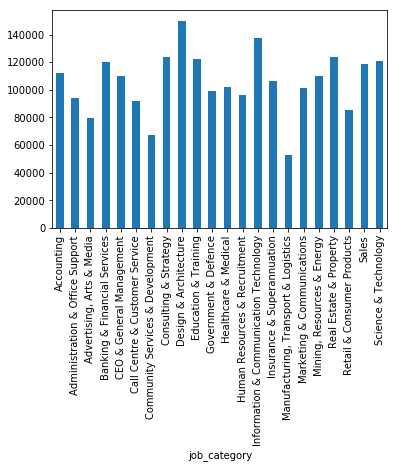

In [440]:
%matplotlib inline
def plot_mean_by_something(column_name):
    df_jobs.groupby(column_name).salary4.mean().plot.bar()

plot_mean_by_something('job_category')

In [441]:
df_jobs[df_jobs['job_category'] == 'Design & Architecture']

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,salary4
job_id,,,,,,,,,,,
34368374,Hudson,"CBD, Inner West & Eastern Suburbs",Sydney,Senior UX Designer. ..The Company.One of ...,Design & Architecture,Senior UX Designer,2017-09-10T23:11:01.000Z,$140k - $159999 p.a. + super,New South Wales,Contract/Temp,149999.5


In [442]:
all_ad = set(df_jobs.advertiser)
for ad in all_ad:
    df_jobs[ad] = numpy.where(df_jobs.advertiser == ad,1,0)

In [446]:
df_jobs.shape

(521, 198)

In [447]:
all_city = set(df_jobs.city)
for ct in all_city:
    df_jobs[ct] = numpy.where(df_jobs.city == ct,1,0)

In [448]:
df_jobs

,advertiser,area,city,description,job_category,job_title,listed_date,salary,state,work_type,...,"Newcastle, Maitland & Hunter",Gosford & Central Coast,Melbourne,Townsville & Northern QLD,Perth,Sydney,ACT,Hobart,Gold Coast,Adelaide
job_id,,,,,,,,,,,,,,,,,,,,,
34388333,Peter Lee Associates,"CBD, Inner West & Eastern Suburbs",Sydney,Junior Research Analyst (Graduate Opportunity)...,Marketing & Communications,Junior Research Analyst (Graduate Opportunity),2017-09-12T08:29:12.000Z,"Starting salary $42,000 plus superannuation",New South Wales,Full Time,...,0,0,0,0,0,1,0,0,0,0
34253423,Big Wednesday,NaN,ACT,Data Analyst (Data Team) - Relocate to Bangkok...,Information & Communication Technology,Data Analyst (Data Team) - Relocate to Bangkok,2017-08-27T15:00:45.000Z,£35k - £55k p.a. + Negotiable,Australian Capital Territory,Full Time,...,0,0,0,0,0,0,1,0,0,0
34270063,SALT SEARCH PTY LTD,NaN,Sydney,Marketing Automation Analyst. ..Marketing...,Information & Communication Technology,Marketing Automation Analyst,2017-08-29T04:34:14.000Z,$50000.00 - $70000.00 p.a.,New South Wales,Full Time,...,0,0,0,0,0,1,0,0,0,0
34251801,Pulse Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,Graduate Media Trader. .Our client is a...,"Advertising, Arts & Media",Graduate Media Trader,2017-08-26T00:01:32.000Z,"$50,000 + Super + Bonus",New South Wales,Full Time,...,0,0,0,0,0,1,0,0,0,0
34232285,Pulse Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,Graduate Programmatic Trader. .Our clie...,Marketing & Communications,Graduate Programmatic Trader,2017-08-24T00:02:48.000Z,"$50,000 + Super + Bonus",New South Wales,Full Time,...,0,0,0,0,0,1,0,0,0,0
34232283,Pulse Recruitment,"CBD, Inner West & Eastern Suburbs",Sydney,Graduate Media Trader. .Our client is a...,"Advertising, Arts & Media",Graduate Media Trader,2017-08-24T00:02:46.000Z,"$50,000 + Super + Bonus",New South Wales,Full Time,...,0,0,0,0,0,1,0,0,0,0
34400592,Kogan.com,CBD & Inner Suburbs,Melbourne,Assistant Buyer. ....We're Kogan.com - pi...,Retail & Consumer Products,Assistant Buyer,2017-09-13T22:30:31.000Z,"$45,000 - $55,000",Victoria,Full Time,...,0,0,1,0,0,0,0,0,0,0
34251215,Proforce,CBD & Inner Suburbs,Melbourne,"Graduate Data Engineer - Melbourne, VIC. ...",Information & Communication Technology,"Graduate Data Engineer - Melbourne, VIC",2017-08-25T22:00:50.000Z,"$50,000",Victoria,Full Time,...,0,0,1,0,0,0,0,0,0,0
34278183,River City Seafood,CBD & Inner Suburbs,Brisbane,Seafood Buyer. ....River City Seafood i...,"Manufacturing, Transport & Logistics",Seafood Buyer,2017-08-30T02:16:21.000Z,"$50,000 - $54,999 base plus commission",Queensland,Full Time,...,0,0,0,0,0,0,0,0,0,0


In [449]:
all_jobcate = set(df_jobs.job_category)
for jc in all_jobcate:
    df_jobs[jc] = numpy.where(df_jobs.job_category == jc,1,0)

In [450]:
all_wktype = set(df_jobs.work_type)
for wt in all_wktype:
    df_jobs[wt] = numpy.where(df_jobs.work_type == wt,1,0)

In [452]:
df_jobs.columns

Index([u'advertiser', u'area', u'city', u'description', u'job_category',
       u'job_title', u'listed_date', u'salary', u'state', u'work_type',
       ...
       u'Government & Defence', u'Call Centre & Customer Service',
       u'Healthcare & Medical', u'Sales', u'Administration & Office Support',
       u'Accounting', u'Full Time', u'Casual/Vacation', u'Contract/Temp',
       u'Part Time'],
      dtype='object', length=236)

In [465]:
# deleting columns that not relevant
del df_jobs['job_category']

In [466]:
df_jobs

,salary4,Paras & Partners – Healthcare,HubExec,BI & DW Australia,Absolute IT - 98.9%* of placed candidates will recommend us to others,Preacta Recruitment,Precision Sourcing,iKas International Australia,Randstad - Technologies,AddSense,...,Government & Defence,Call Centre & Customer Service,Healthcare & Medical,Sales,Administration & Office Support,Accounting,Full Time,Casual/Vacation,Contract/Temp,Part Time
job_id,,,,,,,,,,,,,,,,,,,,,
34388333,42000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34253423,45000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34270063,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34251801,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34232285,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34232283,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34400592,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34251215,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34278183,52499.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [479]:
interest_cols = df_jobs.loc[:, df_jobs.columns != 'salary4'].columns

In [480]:
import sklearn.model_selection
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(df_jobs[interest_cols], 
                                                                          df_jobs.salary4)

In [481]:
import sklearn.tree
DF = df_jobs
DTR = sklearn.tree.DecisionTreeRegressor(max_depth=3)
DTR.fit(Xtrain, Ytrain)
DTR.predict(Xtest)

array([ 133447.72012579,  107928.93406593,  107928.93406593,
        133447.72012579,  107928.93406593,  107928.93406593,
        107928.93406593,  133447.72012579,  107928.93406593,
        133447.72012579,  133447.72012579,  107928.93406593,
        107928.93406593,  133447.72012579,  133447.72012579,
        133447.72012579,  107928.93406593,  107928.93406593,
        107928.93406593,  133447.72012579,  107928.93406593,
        133447.72012579,  107928.93406593,  107928.93406593,
        107928.93406593,  133447.72012579,  133447.72012579,
        128895.1969697 ,  107928.93406593,  133447.72012579,
        133447.72012579,  107928.93406593,   50000.        ,
        107928.93406593,  107928.93406593,  128895.1969697 ,
        107928.93406593,  107928.93406593,  107928.93406593,
        107928.93406593,  128895.1969697 ,  107928.93406593,
         58200.        ,  133447.72012579,  107928.93406593,
        133447.72012579,  107928.93406593,  128895.1969697 ,
        107928.93406593,

In [490]:
from sklearn.grid_search import GridSearchCV
params = {'max_depth': range(1,20)}
DTR_CV = GridSearchCV(DTR, 
                           params,
                           cv=6,
                         scoring='mean_squared_error')

In [504]:
#predict = DTR.predict(Xtest)
DTR.score(Xtest, Ytest)

0.056210099912505584

In [532]:
lasso_cv = sklearn.linear_model.LassoCV(alphas=[45,50,75,80,86.1,86.2, 86.3,86.4,86.5,90,105],
                                       normalize=True,
                                       cv=4,
                                        n_jobs=-1
                                       )
lasso_cv.fit(Xtrain, Ytrain)
print "Best alpha is ", lasso_cv.alpha_
print "Best intercept is", lasso_cv.intercept_
zip(lasso_cv.coef_, interest_cols)

Best alpha is  86.1
Best intercept is 108500.157067


[(0.0, 'Paras & Partners \xe2\x80\x93 Healthcare'),
 (44436.614494847738, 'HubExec'),
 (0.0, 'BI & DW Australia'),
 (0.0,
  'Absolute IT - 98.9%* of placed candidates will recommend us to others'),
 (38853.632377550297, 'Preacta Recruitment'),
 (-0.0, 'Precision Sourcing'),
 (0.0, 'iKas International Australia'),
 (0.0, 'Randstad - Technologies'),
 (-15992.023214164799, 'AddSense'),
 (-0.0, 'QIMR Berghofer Medical Research Institute'),
 (0.0, 'T+O+M Executive'),
 (-0.0, 'Michael Page'),
 (0.0, 'Davidson Technology'),
 (0.0, 'Agile BI'),
 (0.0, 'Artesian Venture Partners'),
 (-0.0, 'QR Solutions'),
 (0.0, 'Infopeople'),
 (30719.59160186275, 'Greythorn'),
 (-0.0, 'Complete Staff Solutions Pty Ltd'),
 (0.0, 'Lime Resourcing'),
 (0.0, 'HIREHR'),
 (-0.0, 'CITI Recruitment'),
 (0.0, 'Robert Half Executive Search'),
 (0.0, 'Redwolf + Rosch'),
 (0.0, 'Peoplebank Australia NSW'),
 (0.0, 'Grant Executive Search'),
 (0.0, 'Mars Recruitment'),
 (-11690.137189984896, 'Alfred Health'),
 (57386.83555

## Summary

- The most tricky party for this task is to get the data from the websites. After concatenating, around 2000 entrys and 11 rows are got.
- For factors that impact salary, the decision tree regression and lasso regression are applied. However, the decision score is not really good. From the lasso regression, we can see that, certain features, such as if the job type is contract for temp, and if 'Call Centre & Customer Service' or 'Information & Communication Technology'), can have huge impact on the salary level
- For the factors that distinguish job category, it is observed that in the job description, words such as 'uncovers', 'federated', 'deeper', and etc. appear more rare.
- As to the limitations, due to the various ways of descriping the jobs, the job titles are hard to identify therefore the industries of the jobs were uesed for analysis instead, this will cause inaccuracy.